In [1]:
import numpy as np
import pandas as pd
import warnings
import itertools

import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm 
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('data.csv')
df.columns=["Date","B","R"]
df.head()

,Date,B,R
0,1/1/2010,39.45,51.21
1,1/2/2010,46.53,49.67
2,1/3/2010,37.03,44.08
3,1/4/2010,48.44,49.04
4,1/5/2010,39.79,40.58


In [3]:
df = df.drop(columns=["R"])

In [4]:
df.head()

,Date,B
0,1/1/2010,39.45
1,1/2/2010,46.53
2,1/3/2010,37.03
3,1/4/2010,48.44
4,1/5/2010,39.79


In [5]:
df.tail()

,Date,B
1456,12/27/2013,NaN
1457,12/28/2013,NaN
1458,12/29/2013,NaN
1459,12/30/2013,NaN
1460,12/31/2013,NaN


In [6]:
df.shape

(1461, 2)

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,B
0,2010-01-01,39.45
1,2010-01-02,46.53
2,2010-01-03,37.03
3,2010-01-04,48.44
4,2010-01-05,39.79


In [9]:
df.set_index('Date', inplace = True)

In [10]:
df.head()

,B
Date,
2010-01-01,39.45
2010-01-02,46.53
2010-01-03,37.03
2010-01-04,48.44
2010-01-05,39.79


In [11]:
df.isnull().sum()

B    269
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.head()

,B
Date,
2010-01-01,39.45
2010-01-02,46.53
2010-01-03,37.03
2010-01-04,48.44
2010-01-05,39.79


In [14]:
df.tail()

,B
Date,
2013-11-28,19.05
2013-11-29,22.64
2013-11-30,21.74
2013-12-01,22.87
2013-12-02,30.90


In [15]:
df.shape

(1192, 1)

In [16]:
df.head()

,B
Date,
2010-01-01,39.45
2010-01-02,46.53
2010-01-03,37.03
2010-01-04,48.44
2010-01-05,39.79


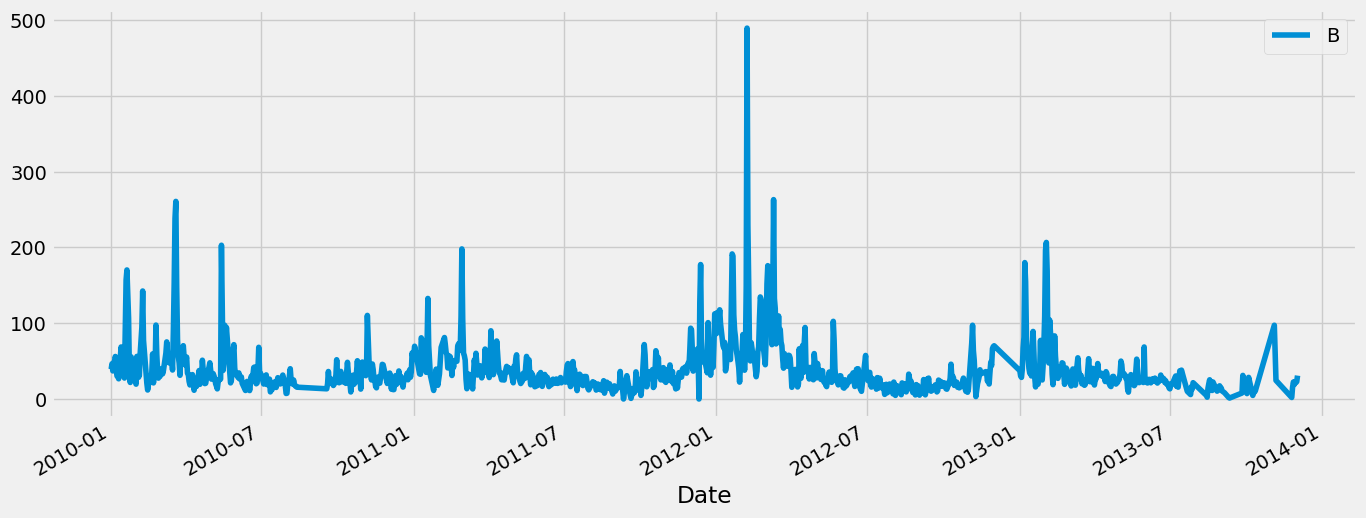

In [17]:
df.plot(figsize=(15, 6))
plt.show()

In [18]:
import itertools

# Définir les plages pour p, d et q sans composante saisonnière
p = [0, 1, 2]
d = [1]  # Au moins une différenciation est nécessaire pour rendre les données stationnaires
q = [0, 1, 2]

# Générer les combinaisons de paramètres pour ARIMA non saisonnier
pdq = list(itertools.product(p, d, q))

# Afficher les combinaisons de paramètres
for param in pdq:
    print('ARIMA{}'.format(param))


ARIMA(0, 1, 0)
ARIMA(0, 1, 1)
ARIMA(0, 1, 2)
ARIMA(1, 1, 0)
ARIMA(1, 1, 1)
ARIMA(1, 1, 2)
ARIMA(2, 1, 0)
ARIMA(2, 1, 1)
ARIMA(2, 1, 2)


In [20]:
# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Paramètres pour ARIMA
p = [0, 1, 2, 3, 4, 5, 6]
d = [0, 1]  # Au moins une différenciation est nécessaire pour rendre les données stationnaires
q = [0, 1, 2, 3, 4, 5, 6]

# Générer les combinaisons de paramètres pour ARIMA non saisonnier
pdq = list(itertools.product(p, d, q))



# Itérer sur les combinaisons de paramètres
for param in pdq:
        try:
            model = sm.tsa.ARIMA(df,
                                 order=param)
            results = model.fit()
            print(f'ARIMA{param} - AIC:{results.aic}')
        except Exception as e:
            print(f'ARIMA{param} - Exception: {e}')
            continue


ARIMA(0, 0, 0) - AIC:11751.855982335488
ARIMA(0, 0, 1) - AIC:11088.099765883278
ARIMA(0, 0, 2) - AIC:10889.91168315331
ARIMA(0, 0, 3) - AIC:10845.660514969994
ARIMA(0, 0, 4) - AIC:10833.501541424866
ARIMA(0, 0, 5) - AIC:10826.154137292488
ARIMA(0, 0, 6) - AIC:10819.232066073298
ARIMA(0, 1, 0) - AIC:10971.798824144094
ARIMA(0, 1, 1) - AIC:10970.63827092393
ARIMA(0, 1, 2) - AIC:10829.857123520838
ARIMA(0, 1, 3) - AIC:10749.048262095446
ARIMA(0, 1, 4) - AIC:10743.644361013023
ARIMA(0, 1, 5) - AIC:10745.553932760628
ARIMA(0, 1, 6) - AIC:10747.51136869325
ARIMA(1, 0, 0) - AIC:10817.368554527673
ARIMA(1, 0, 1) - AIC:10802.71599571849
ARIMA(1, 0, 2) - AIC:10800.553718827017
ARIMA(1, 0, 3) - AIC:10753.489581593785
ARIMA(1, 0, 4) - AIC:10749.109253015075
ARIMA(1, 0, 5) - AIC:10751.08109154573
ARIMA(1, 0, 6) - AIC:10753.072047387126
ARIMA(1, 1, 0) - AIC:10972.105452099957
ARIMA(1, 1, 1) - AIC:10781.78383765333
ARIMA(1, 1, 2) - AIC:10747.175011525505
ARIMA(1, 1, 3) - AIC:10743.660484101169
ARIMA(

In [26]:
Best_model = sm.tsa.ARIMA(df['B'],
                          order=(2, 1, 1))
results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0025      1.476     -0.002      0.999      -2.895       2.890
ar.L2         -0.3592      1.127     -0.319      0.750      -2.567       1.849
ar.L3         -0.0924      1.641     -0.056      0.955      -3.308       3.123
ar.L4          0.3133      1.217      0.258      0.797      -2.072       2.698
ar.L5         -0.3463      0.779     -0.445      0.657      -1.873       1.180
ar.L6          0.2020      0.314      0.643      0.520      -0.414       0.818
ma.L1         -0.2092      1.475     -0.142      0.887      -3.101       2.683
ma.L2          0.0222      1.402      0.016      0.987      -2.726       2.770
ma.L3         -0.2090      1.404     -0.149      0.882      -2.961       2.543
ma.L4         -0.5364      1.511     -0.355      0.723      -3.499       2.426
ma.L5          0.2872      0.722      0.398      0.6

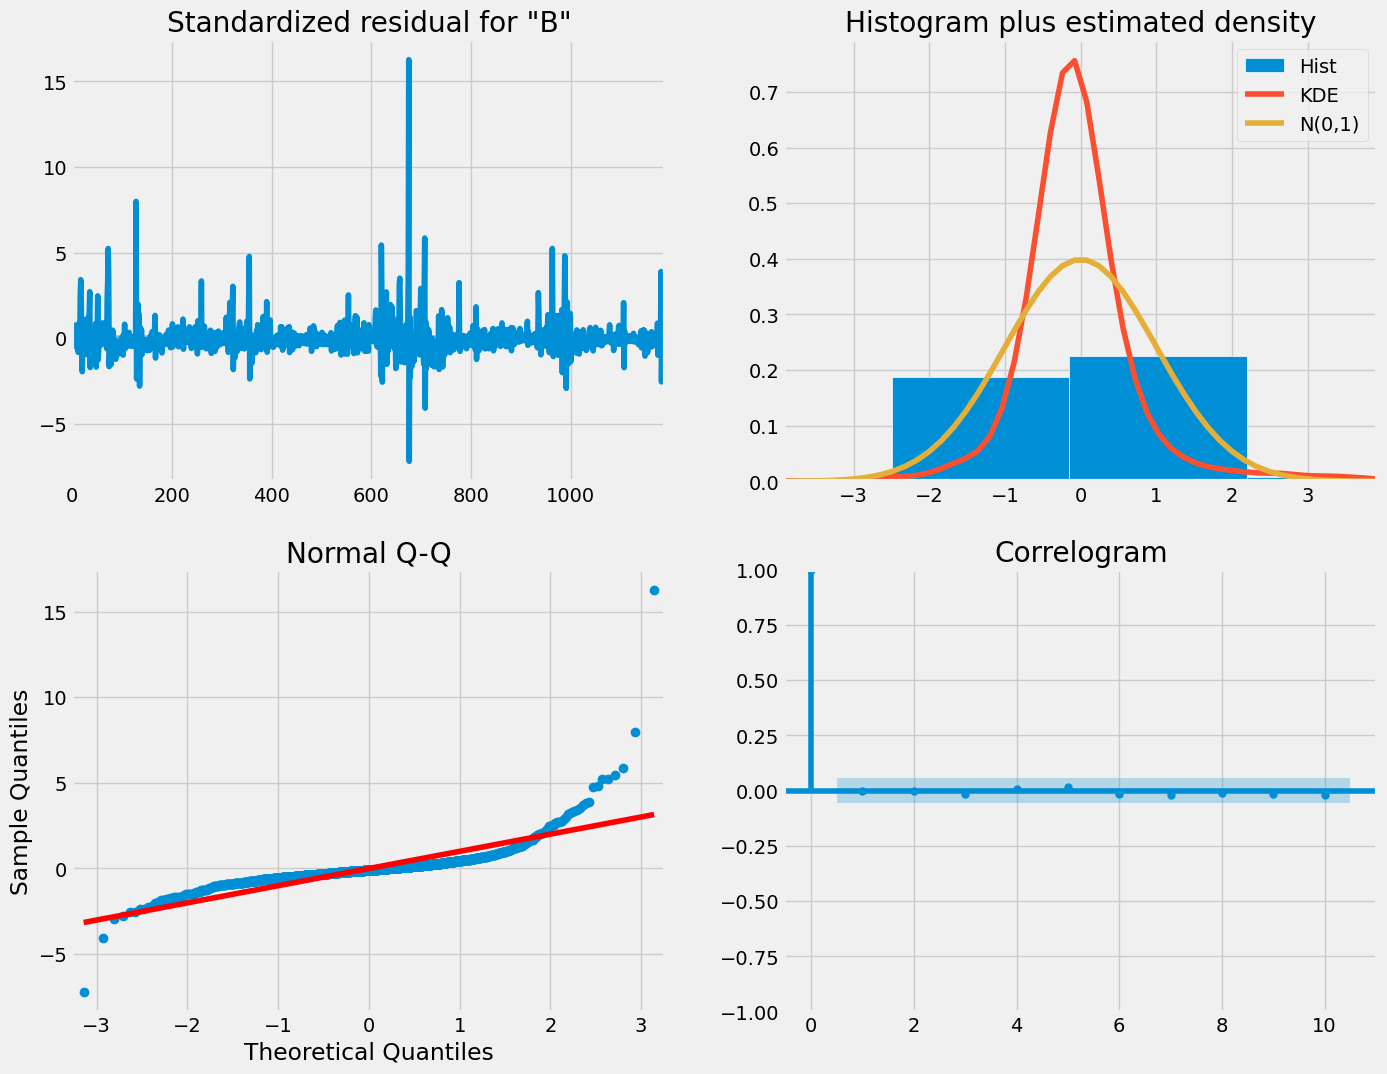

In [27]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower B,upper B
Date,,
2013-09-01,-27.032767,58.435006
2013-09-02,-27.230844,58.236929
2013-09-05,-30.203717,55.264056
2013-09-10,-31.418048,54.049725
2013-09-11,-35.687832,49.779941
2013-09-26,-35.669062,49.798711
2013-09-27,-30.732325,54.735448
2013-10-02,-13.851566,71.616207
2013-10-03,-37.003553,48.464220


In [29]:
y_forecasted = pred.predicted_mean
y_truth = df['2013-09-01':]
y_truth['pre_B'] = y_forecasted
y_truth

,B,pre_B
Date,,
2013-09-01,14.37,15.701119
2013-09-02,10.63,15.503043
2013-09-05,8.17,12.530170
2013-09-10,1.95,11.315838
2013-09-11,1.28,7.046054
2013-09-26,7.91,7.064825
2013-09-27,31.18,12.001561
2013-10-02,7.15,28.882320
2013-10-03,13.44,5.730333


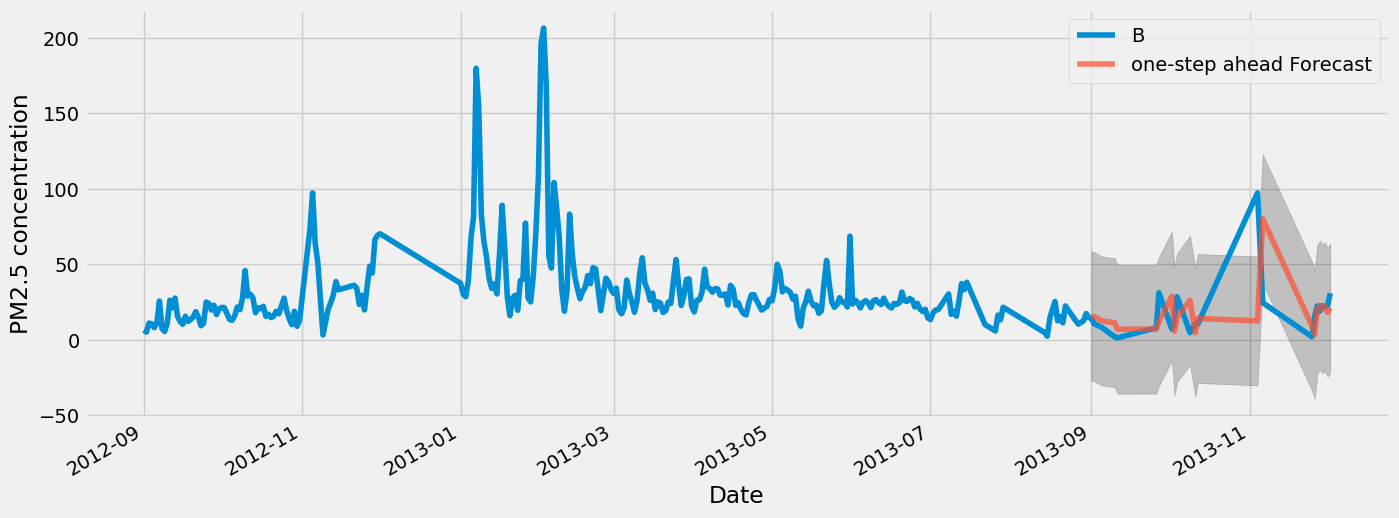

In [34]:
ax = df['2012-09-01':].plot(label='observed', figsize=(15, 6))
pred.predicted_mean.plot(ax=ax, label='one-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()

In [35]:
mse = ((y_truth.B - y_truth.pre_B)**2).mean()
print('Mea Squraed Error = ', mse)

Mea Squraed Error =  539.636283910237


In [36]:
rmse = np.sqrt(mse)
print('Root Mean Squraed Error = ', rmse)

Root Mean Squraed Error =  23.23007283480267


In [37]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

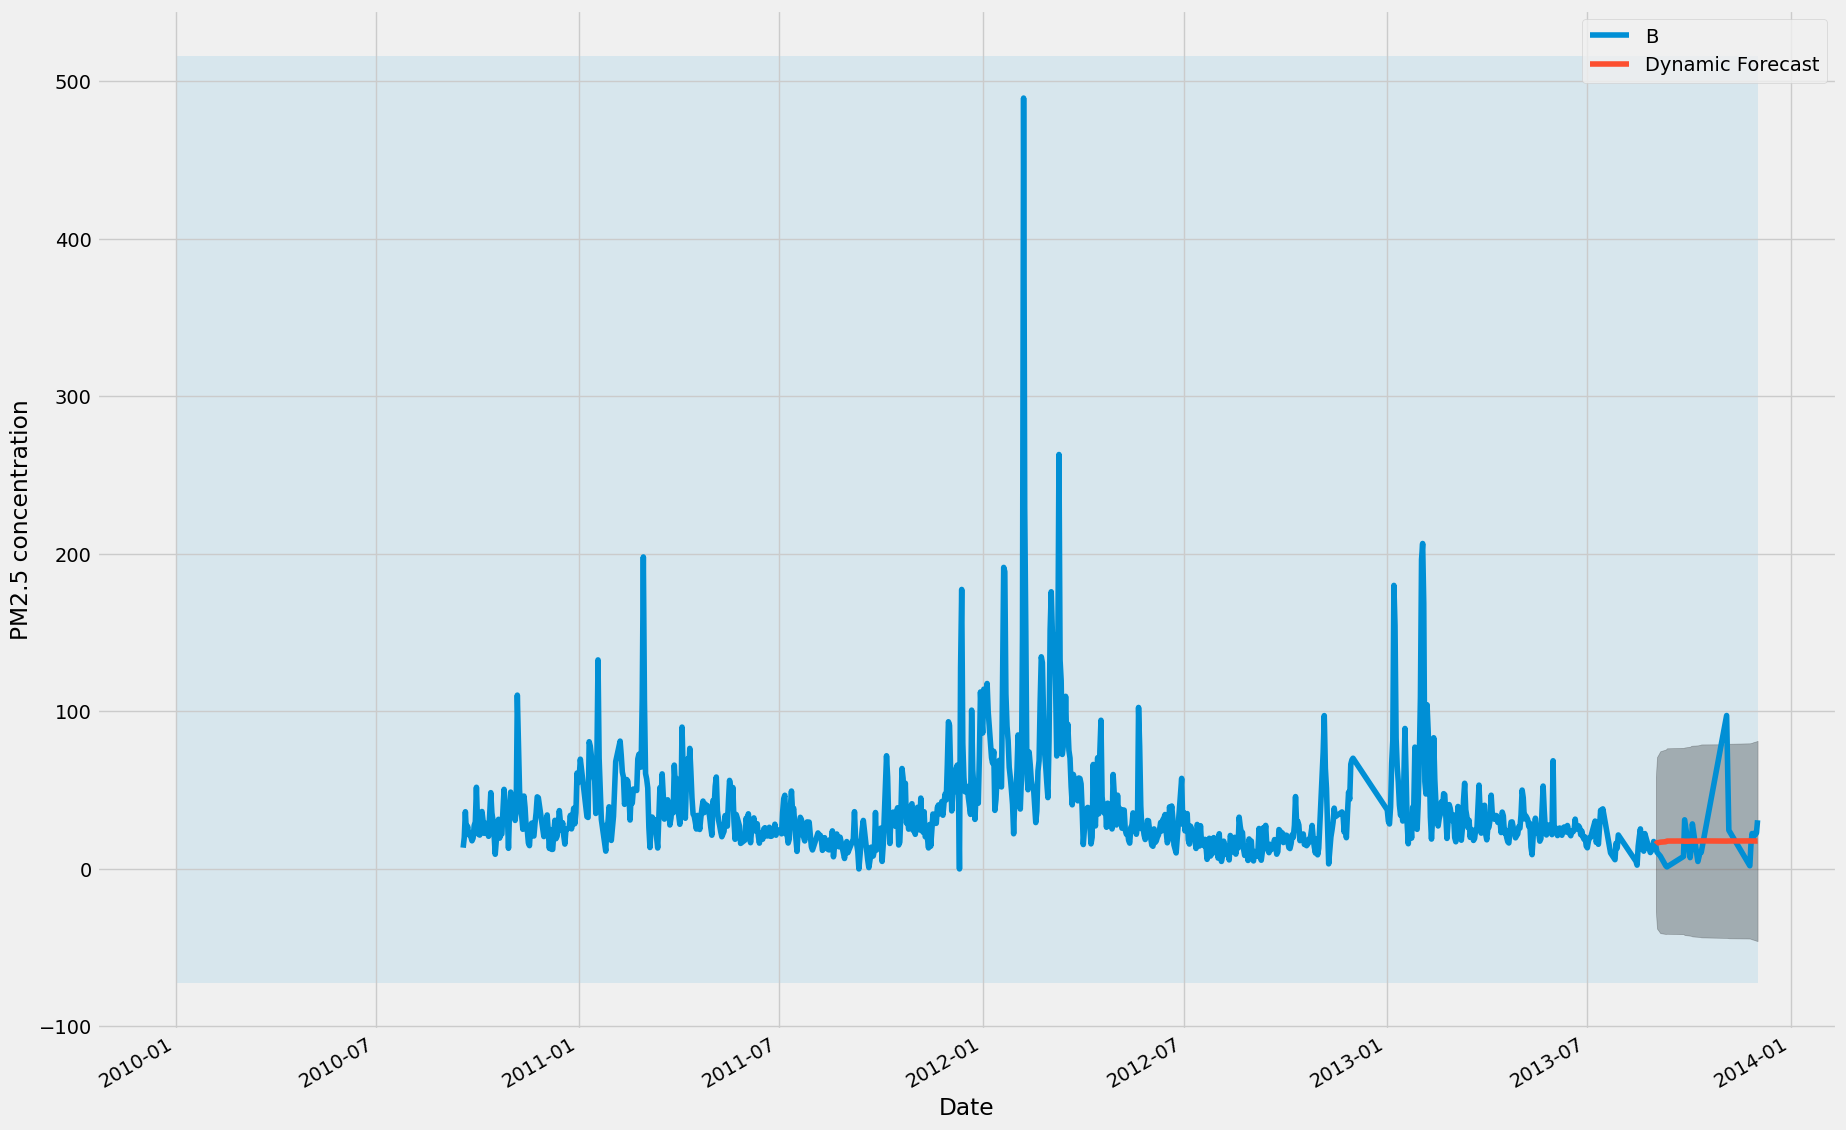

In [38]:
ax = df['2010-09-01':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2010-01-01'), df.index[-1],
                alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()

In [39]:
pred_uc = results.get_forecast(steps= 60)

pred_ci = pred_uc.conf_int()

In [40]:
future_df = pd.DataFrame(pred_uc.predicted_mean)
future_df.columns = ['Future_pred']
future_df

,Future_pred
1192,29.717908
1193,25.180974
1194,21.201366
1195,21.035573
1196,21.855539
1197,20.982953
1198,20.791405
1199,21.439209
1200,21.097371
1201,20.292347


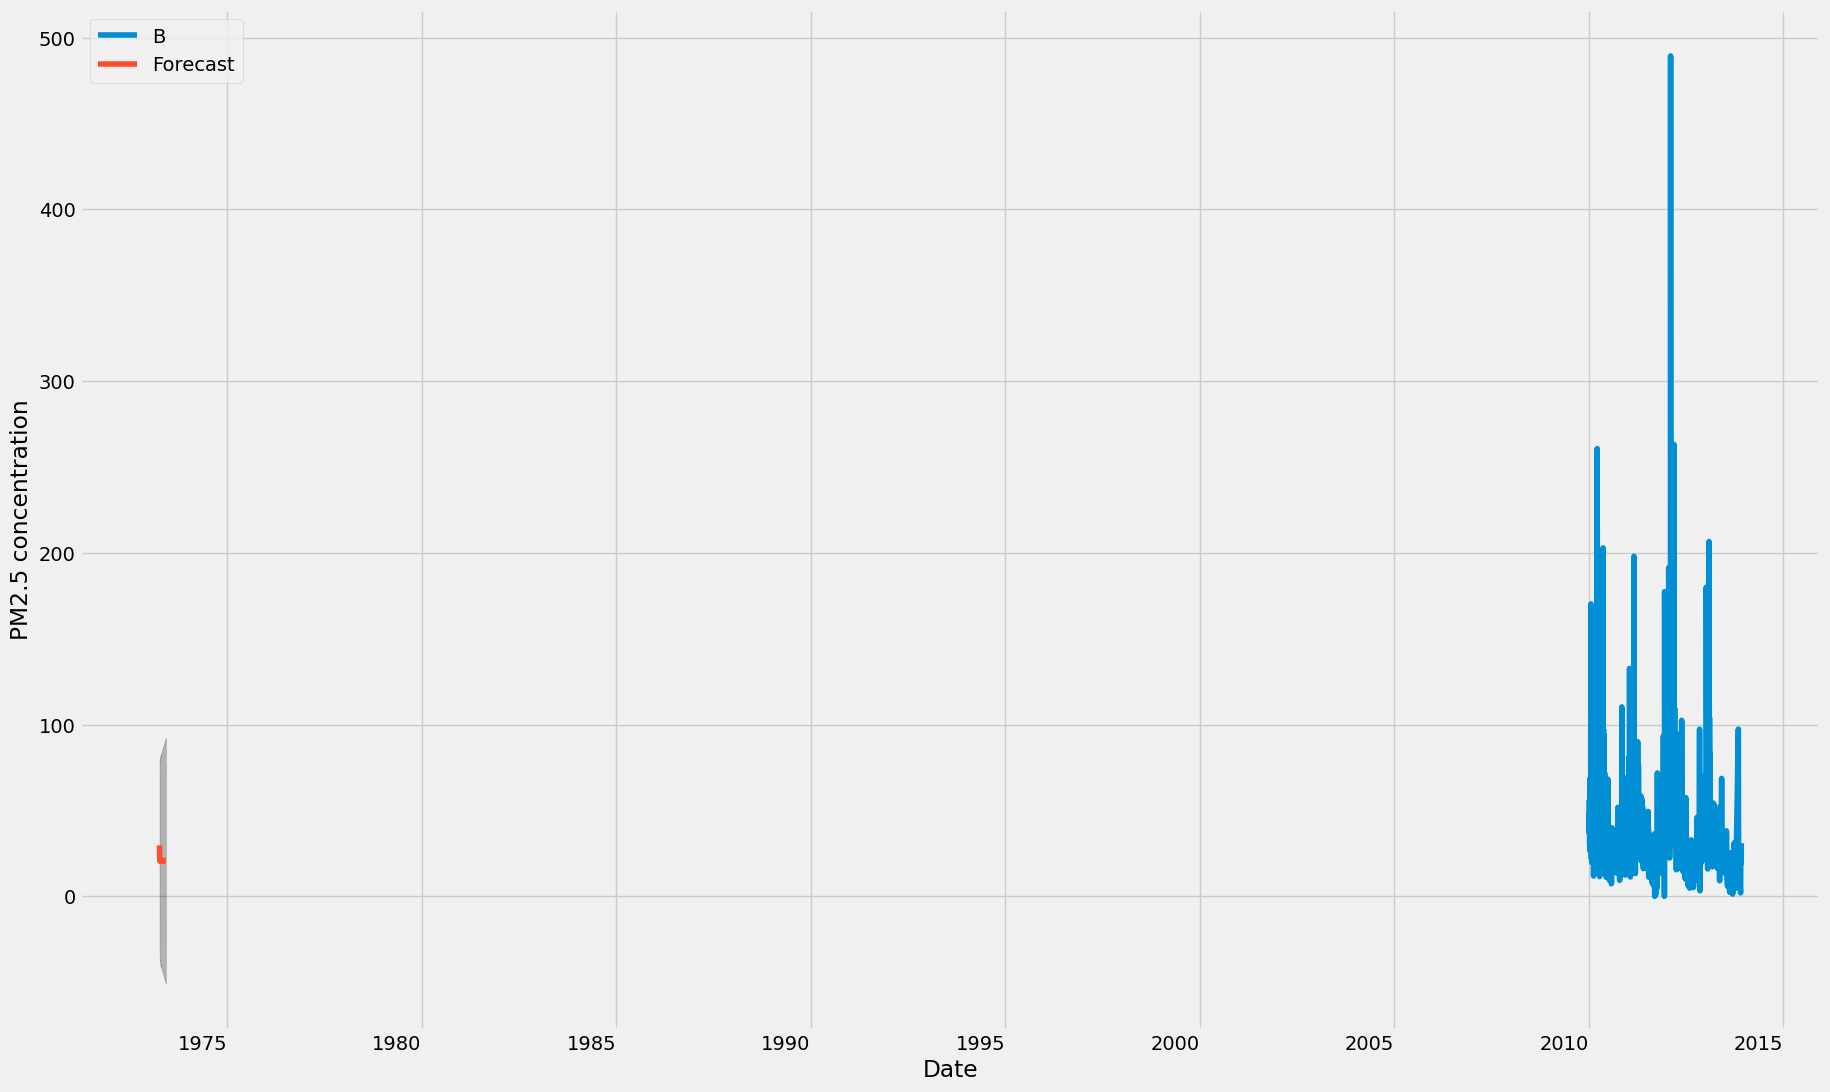

In [41]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 concentration')
plt.legend()

plt.show()